<a href="https://colab.research.google.com/github/kushalk20/Deep-Learning/blob/main/simpleNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 21st October, 2022
# fashion_mnist dataset
# https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [1]:
# 1.0
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 2.0 Mount google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# 2.1 Read FASHION-MNIST data

path = "/gdrive/MyDrive/Deep Learning/"


In [4]:
# 2.2
data = pd.read_csv(path + "fashion_mnist_train.csv")

In [5]:
# 2.2.1
data.head() # In every image lots of pixels are there.....1 row has only 1 image but there is lot of imformation in that... In our dataset, there are 784 pixels, means each image
# has 28 height pixels & 28 width pixels... therefore 28*28=784

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 2.2.2
data.shape

(60000, 785)

In [7]:
# 2.3 Pop out target
y = data.pop('label')

In [8]:
# 2.3.1
data.shape

(60000, 784)

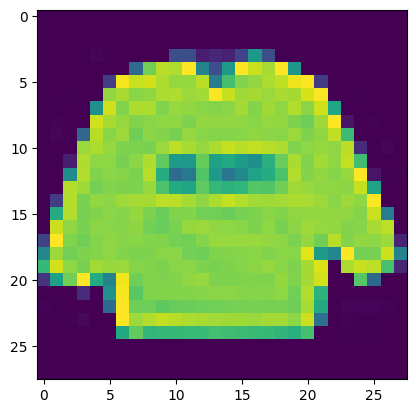

In [9]:
# 3.0 Plotting Image 1, iloc[0,:] means row 0 & all the columns, then we are saying the pixel dataset to rehaspe to 28 by 28 as 784 is square of 28 by 28....(.value) is
# converting the data into numpy arrays.... then we are reshaping...
plt.imshow(data.iloc[0,:].values.reshape(28,28));

In [16]:
y.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25)

In [22]:
X_train.shape

(45000, 784)

In [23]:
y_train.shape

(45000,)

In [24]:
# Standardizing X_train & using mean & std deviation of X_train to standardize X_test also
ss= StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [25]:
# MODEL
mx = tf.keras.Sequential()

In [26]:
mx.add(tf.keras.layers.Input(shape= [784 ]))

In [27]:
mx.add(tf.keras.layers.Dense(512, activation = 'relu'))

In [28]:
mx.add(tf.keras.layers.Dense(256, activation = 'relu'))

In [29]:
mx.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
# Use relu when output is continuous & positive not in the case when output is also negative.. Use linear activation function there is continous functionn & negative
# Whenever there are more than 2 neurons (categories) in output layer, then we can use Softmax as activation function....Softmax gives the between 0 & 1... And sum of all
# output will be 1.... This can be taken as it is giving a probability... So, we infer that jiski probability jayda hogi.. so that image is the outcome.... For example
# Shoe aane ki probability 0.1 haim Jacket ki 0.4, Shirt ki 0.2, & Trouser ki 0.3 hai... So, The ouput is Jacket is more probable than any other..

In [30]:
mx.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 401920, has come from 784*512 but there is one bias in every bias.. so there 512 bias also
# Similarly, aise hi 131328 ke liye (256*512)+256
# To increase the parameters add data & neurons

In [32]:
mx.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           metrics = ['acc'])

In [ ]:
mx.fit(X_train, y_train, epochs = 128)

Epoch 1/128


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 15s 10ms/step - loss: 0.5001 - acc: 0.8273
Epoch 2/128
1407/1407 [==============================] - 14s 10ms/step - loss: 0.4094 - acc: 0.8616
Epoch 3/128
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3927 - acc: 0.8746
Epoch 4/128
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3916 - acc: 0.8805
Epoch 5/128
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3806 - acc: 0.8866
Epoch 6/128
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3744 - acc: 0.8910
Epoch 7/128
1407/1407 [==============================] - 16s 12ms/step - loss: 0.3781 - acc: 0.8948
Epoch 8/128
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3716 - acc: 0.9006
Epoch 9/128
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3602 - acc: 0.9018
Epoch 10/128
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3722 - acc: 0.9040
Epoch 11/128

In [ ]:
# 3.1
data[:2]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 4.0
# ss = StandardScaler()
# ss.fit(data)
# df = ss.transform(data)

In [ ]:
# 4.1
df.shape

(60000, 784)

In [ ]:
# 4.2
np.round(df[:10],1)

array([[-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       ...,
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ],
       [-0. , -0. , -0. , ..., -0.2, -0.1, -0. ]])

## Model

In [ ]:
# 5.0
model = tf.keras.Sequential()

In [ ]:
# 5.1
model.add( tf.keras.layers.Input(shape = [784] ))

In [ ]:
# 5.2
model.add(tf.keras.layers.Dense(20, activation = 'relu'))

In [ ]:
# 5.3
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
# 5.4 Model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5.5 Compile model
model.compile(
                 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ["accuracy"]
              )

In [ ]:
# 6.0
model.fit(df,y, epochs = 50)

In [ ]:
# 6.1
model.evaluate(df,y)

1875/1875 [==============================] - 2s 939us/step - loss: 0.2720 - accuracy: 0.9168


[0.2719540297985077, 0.9168333411216736]

In [ ]:
######################### I am done #################